### Import modules

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
import io
import moviepy.editor as mpy
from PIL import Image
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns

# Plotting style
plt.style.use('ggplot')
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
%config InlineBackend.figure_format='retina'

# Function to generate animations
def mpl_fig2array(plt):
    with io.BytesIO() as buffer:  # use buffer memory
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        img = Image.open(buffer)
        return np.asarray(img)

### Load data

In [2]:
l_study_names = []
l_bunch_nb = [
    76,
    2754,
    1731,
    2682,
    607,
    77,
    3342,
    2053,
    2803,
    74,
    1403,
    2049,
    139,
    848,
    1912,
    398,
    2633,
    2300,
    2854,
    126,
    897,
    222,
    1043,
    154,
    3435,
    942,
    1036,
]
for bunch_nb in l_bunch_nb:
    # Define study
    l_study_names.append(f"opt_flathv_75_1500_withBB_chroma5_1p4_{bunch_nb}")

In [3]:
l_df = []
for study_name in l_study_names:
    try:
        # Load dataframe
        df = pd.read_parquet(f"../{study_name}/da.parquet")
        print(df)
    except:
        df = l_df[0].copy()

    # Round all numbers to 3 decimals
    df = df.round(3)
    l_df.append(df)

df



          normalized amplitude in xy-plane      q1      q2            nb  \
name 1                                                                     
madx_001                           6.03125  62.310  60.316  1.400000e+11   
madx_002                           5.68750  62.310  60.317  1.400000e+11   
madx_003                           6.09375  62.310  60.318  1.400000e+11   
madx_004                           5.68750  62.310  60.319  1.400000e+11   
madx_005                           6.12500  62.310  60.320  1.400000e+11   
madx_006                           5.78125  62.310  60.321  1.400000e+11   
madx_007                           5.65625  62.310  60.322  1.400000e+11   
madx_008                           5.71875  62.310  60.323  1.400000e+11   
madx_009                           5.53125  62.310  60.324  1.400000e+11   
madx_010                           5.25000  62.310  60.325  1.400000e+11   
madx_013                           5.68750  62.311  60.317  1.400000e+11   
madx_014    

,normalized amplitude in xy-plane,q1,q2,nb,on_x1,oct_current,bunch_nb
name 1,,,,,,,
madx_001,6.031,62.310,60.316,1.400000e+11,250.0,60.0,76.0
madx_002,5.688,62.310,60.317,1.400000e+11,250.0,60.0,76.0
madx_003,6.094,62.310,60.318,1.400000e+11,250.0,60.0,76.0
madx_004,5.688,62.310,60.319,1.400000e+11,250.0,60.0,76.0
madx_005,6.125,62.310,60.320,1.400000e+11,250.0,60.0,76.0
madx_006,5.781,62.310,60.321,1.400000e+11,250.0,60.0,76.0
madx_007,5.656,62.310,60.322,1.400000e+11,250.0,60.0,76.0
madx_008,5.719,62.310,60.323,1.400000e+11,250.0,60.0,76.0
madx_009,5.531,62.310,60.324,1.400000e+11,250.0,60.0,76.0


In [4]:
l_df_to_plot = []
for df in l_df:
    # Reshape for plotting
    try:
        df_to_plot = df.pivot(index="q2", columns="q1", values="normalized amplitude in xy-plane")
    except:
        df_to_plot = pd.DataFrame()
    l_df_to_plot.append(df_to_plot)
    
df_to_plot


q1,62.310,62.311,62.312,62.313,62.314,62.315,62.316,62.317,62.318,62.319
q2,,,,,,,,,,
60.316,6.031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,5.688,5.688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.318,6.094,5.688,7.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.319,5.688,5.969,7.344,7.406,NaN,NaN,NaN,NaN,NaN,NaN
60.320,6.125,5.812,6.750,7.406,7.344,NaN,NaN,NaN,NaN,NaN
60.321,5.781,6.375,6.594,6.500,6.750,7.188,NaN,NaN,NaN,NaN
60.322,5.656,5.594,6.031,6.750,6.594,6.844,6.719,NaN,NaN,NaN
60.323,5.719,5.469,5.875,6.438,5.844,6.375,6.625,6.719,NaN,NaN
60.324,5.531,5.531,5.688,6.062,5.969,5.844,6.125,6.094,6.031,NaN


In [5]:
# Sort l_bunch_nb and l_df_to_plot by average DA
l_bunch_nb_sorted = []
l_df_to_plot_sorted = []
for i in np.argsort([df.mean().mean() for df in l_df_to_plot]):
    l_bunch_nb_sorted.append(l_bunch_nb[i])
    l_df_to_plot_sorted.append(l_df_to_plot[i])

l_bunch_nb = l_bunch_nb_sorted
l_df_to_plot = l_df_to_plot_sorted



### Plot heatmap for tune-tune scan

Bug with contours


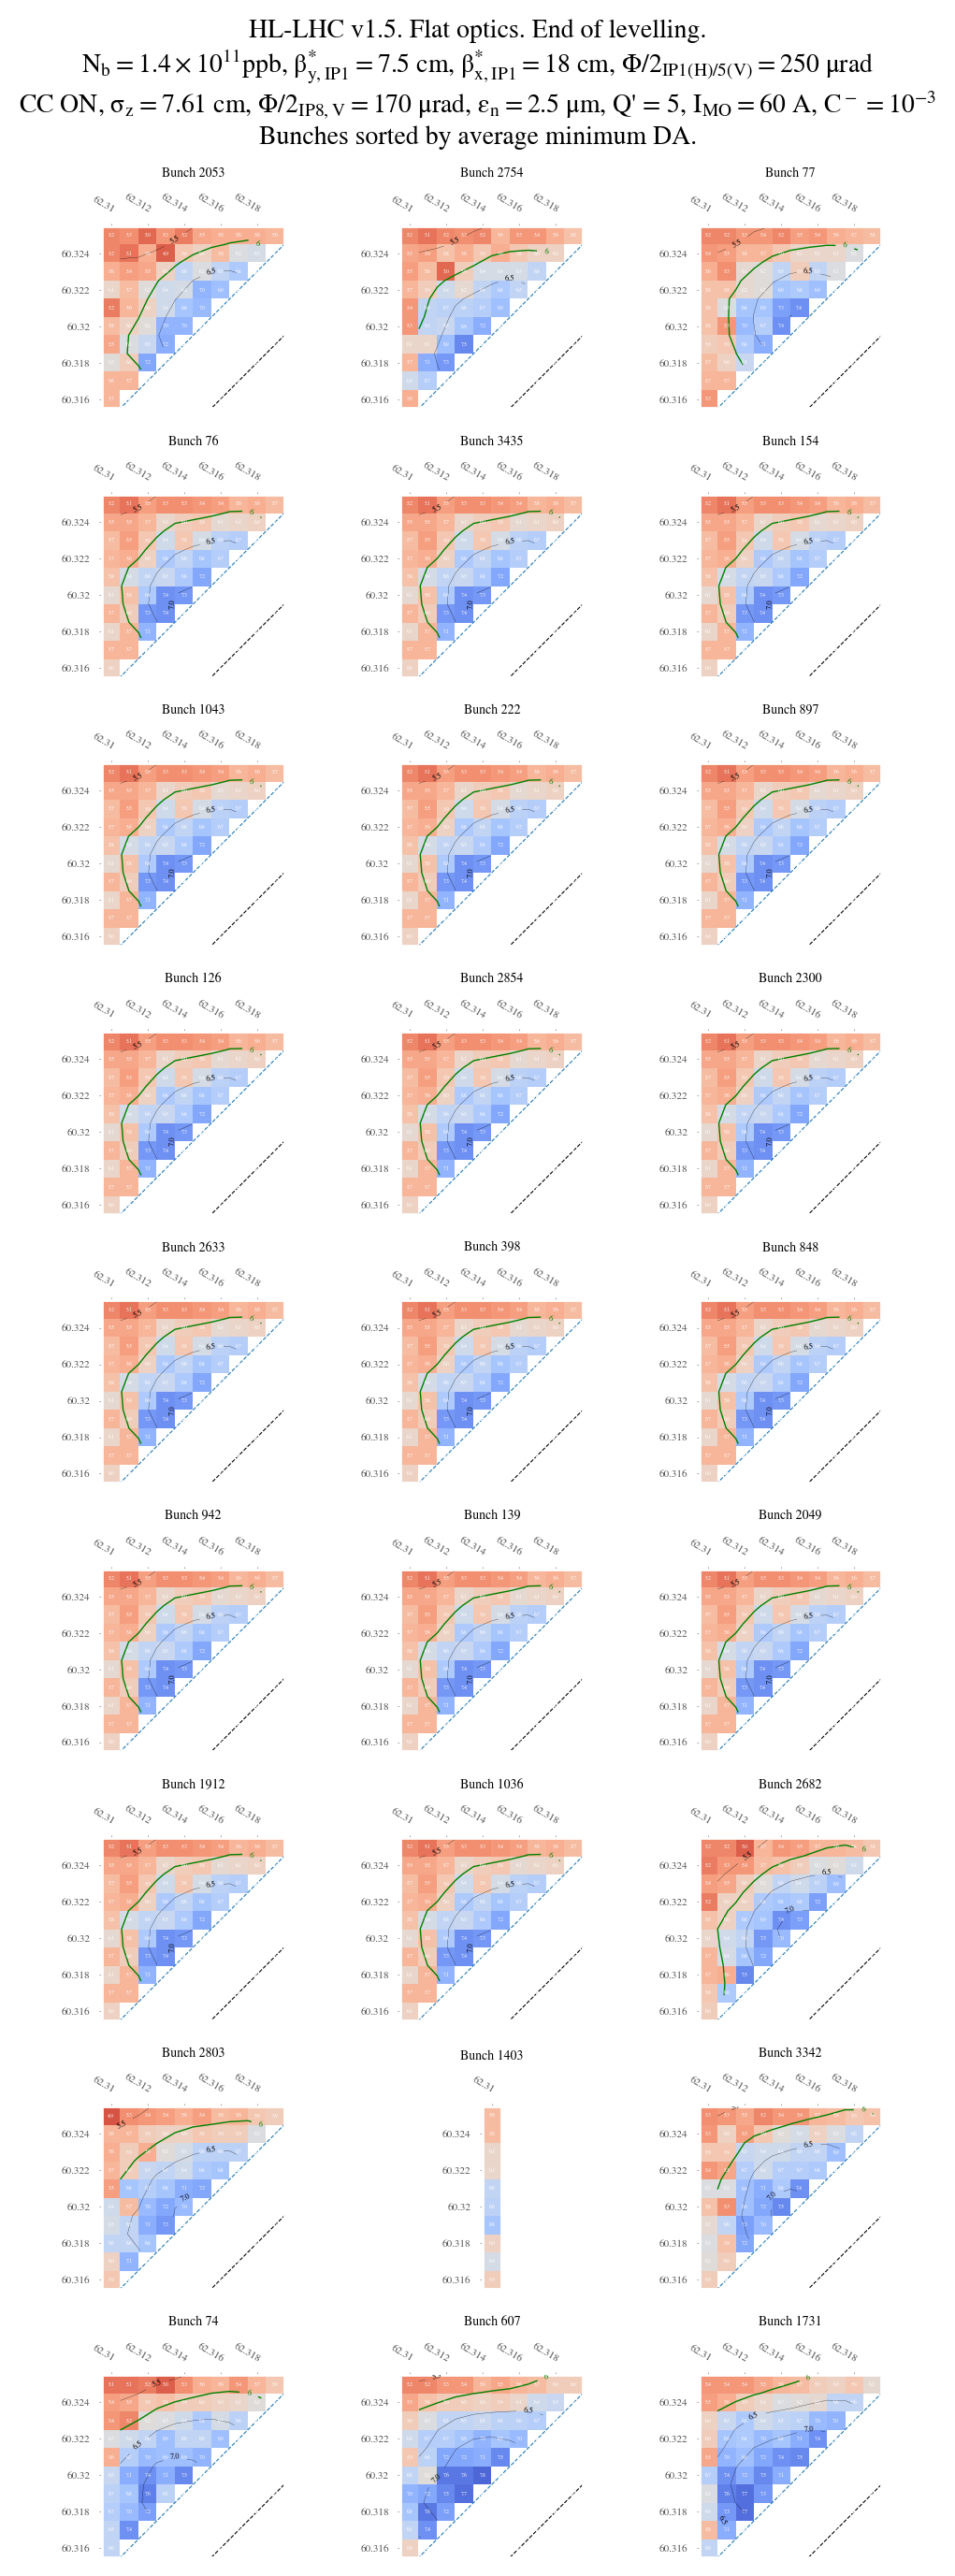

In [7]:
# Function to convert floats to scientific latex format
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str


def plot_heatmap(l_df_to_plot, l_bunch_id):
    cmap = matplotlib.cm.get_cmap("coolwarm_r", 50)
    cmap.set_bad('w')

    fig, array_ax = plt.subplots(nrows = 9, ncols = 3, figsize = (5,14))
    #fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for idx, df_to_plot in enumerate(l_df_to_plot):
        # Get numpy array from dataframe
        data_array = df_to_plot.to_numpy()

        ax = array_ax[idx//3, idx%3]
        im = ax.imshow(data_array, cmap=cmap, vmin=4.5, vmax=8)
        ax.invert_yaxis()

        # Show all ticks and label them with the respective list entries
        ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=df_to_plot.columns[::2], fontsize=4)
        ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2], fontsize=4)
        ax.tick_params(which='both', width=0.2, length=1)


        # Loop over data dimensions and create text annotations.
        for i in range(len(df_to_plot.index)):
            for j in range(len(df_to_plot.columns)):
                text = ax.text(
                    j, i, f"{data_array[i, j]:.1f}", ha="center", va="center", color="w", fontsize=2
                )
                
        # Smooth data for contours
        # make the matrix symmetric by replacing the lower triangle with the upper triangle
        data_smoothed = np.copy(data_array)
        data_smoothed[np.isnan(data_array)] = 0
        try:
            data_smoothed = data_smoothed + data_smoothed.T - np.diag(data_array.diagonal())

            data_smoothed = gaussian_filter(data_smoothed, 1.0)

            # Mask the lower triangle of the smoothed matrix
            mask =  np.tri(data_smoothed.shape[0], k=-1)
            mx = np.ma.masked_array(data_smoothed, mask=mask.T)
        except:
            print("Bug with gaussian filter")
            mx = data_array

        try:
            # Plot contours
            CSS = ax.contour(
                np.arange(0.5, data_array.shape[1]),
                np.arange(0.5, data_array.shape[0]),
                mx,
                colors="black",
                levels=list(np.arange(3, 6, 0.5)) + list(np.arange(6.5, 10, 0.5)),
                linewidths=0.1,
            )
            ax.clabel(CSS, inline=True, fontsize=3)
            CS2 = ax.contour(
                np.arange(0.5, data_array.shape[1]),
                np.arange(0.5, data_array.shape[0]),
                mx,
                colors="green",
                levels=[6],
                linewidths=0.5,
            )
            ax.clabel(CS2, inline=1, fontsize=3)
        except:
            print("Bug with contours")

        # # ! Diagonal lines must be plotted after the contour lines, because of bug in matplotlib
        # Diagonal lines
        ax.plot([0, 1000], [-1, 999], color="tab:blue", linestyle="--", linewidth=0.4)
        ax.plot([0, 1000], [-11, 989], color="tab:blue", linestyle="--", linewidth=0.4)
        ax.plot([0, 1000], [-6, 994], color="black", linestyle="--", linewidth=0.4)

        # ax.set_xlabel("Horizontal tune " + r"$Q_x$")
        # ax.set_ylabel("Vertical tune " + r"$Q_y$")
        ax.set_xlim(0 - 0.5, data_array.shape[1] - 0.5)
        ax.set_ylim(0 - 0.5, data_array.shape[0] - 0.5)

        # Ticks on top
        ax.xaxis.tick_top()
        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

        # Create colorbar
        # cbar = ax.figure.colorbar(im, ax=ax)
        # cbar.ax.set_ylabel("Minimum DA (" + r"$\sigma$" + ")", rotation=90, va="bottom", labelpad=15)
        ax.grid(visible=None)

        # Title
        ax.set_title("Bunch " + str(l_bunch_id[idx]), fontsize=5, fontweight="ultralight")
        

    try: 
        nb_protons = df.nb.min()
    except:
        nb_protons = 1.4e+11
    plt.suptitle(
        "HL-LHC v1.5. Flat optics. End of levelling." 
        + "\n"
        + f"$N_b = $"
        + latex_float(nb_protons)
        + "ppb, "
        + r"$\beta^{*}_{y,IP1} = 7.5$ cm"
        + ", "
        + r"$\beta^{*}_{x,IP1} = 18$ cm"
        + ", "
        + r"$\Phi/2_{IP1(H)/5(V)} = 250$ $\mu rad$"
        + "\n"
        + "CC ON, "
        + r"$\sigma_{z} = 7.61$ $cm$"
        + ", "
        + r"$\Phi/2_{IP8,V} = 170$ $\mu rad$"
        + ", "
        + r"$\epsilon_{n} = 2.5$ $\mu m$"
        + ", "
        + r"Q' = 5"
        + ", "
        + r"$I_{MO} = 60$ $A$"
        + ", "
        + r"$C^-=10^{-3}$" + "\n"
        + "Bunches sorted by average minimum DA.",
        fontsize=10,
    )
    plt.tight_layout()
    plt.savefig("output_opt_flathv_75_1500_withBB_chroma5_1p4_multi_bunches.pdf", bbox_inches="tight")
    plt.show()

plot_heatmap(l_df_to_plot, l_bunch_id = l_bunch_nb)



In [ ]:
len(l_bunch_nb)

27